<a href="https://colab.research.google.com/github/1eetnals/coursera-tfcertificate/blob/main/C3_W2_bbc_text_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [ ]:
#!pip install tensorflow==2.5.0

In [ ]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# bbc-text.csv
!gdown --id 1rX10xeI3eUJmOLsc4pOPY6AnCLO8DxNj

Downloading...
From: https://drive.google.com/uc?id=1rX10xeI3eUJmOLsc4pOPY6AnCLO8DxNj
To: /content/bbc-text.csv
100% 5.06M/5.06M [00:00<00:00, 315MB/s]


In [ ]:
vocab_size = 1000 # YOUR CODE HERE   #tokenizer에 쓰임
embedding_dim = 16 # YOUR CODE HERE
max_length = 120 # YOUR CODE HERE
trunc_type='post' # YOUR CODE HERE 
padding_type='post' # YOUR CODE HERE   뒤에서 0추가
oov_tok = "<OOV>" # YOUR CODE HERE  #tokenizer에 쓰임, 토큰화되지 않은 단어는 <oov>로 처리
training_portion = .8

In [ ]:
sentences = []
labels = []
stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))
# Expected Output
# 153

153


In [ ]:
with open("./bbc-text.csv", 'r') as csvfile:
    
    ### START CODE HERE
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)  #next : 반복가능객체의 다음요소 반환
    for row in reader:   #row는 요소가 두개인 리스트 형식
        #print(row[1])  #tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high-definition tv sets  which are big business in japan and the us  but slower to take off in europe because of the lack of high-definition programming. not only can people forward wind through adverts  they can also forget about abiding by network and channel schedules  putting together their own a-la-carte entertainment. but some us networks and cable and satellite companies are worried about what it means for them in terms of advertising revenues as well as  brand identity  and viewer loyalty to channels. although the us leads in this technology at the moment  it is also a concern that is being raised in europe  particularly with the growing uptake of services like sky+.  what happens here today  we will see in nine months to a years  time in the uk   adam hume  the bbc broadcast s futurologist told the bbc news website. for the likes of the bbc  there are no issues of lost advertising revenue yet. it is a more pressing issue at the moment for commercial uk broadcasters  but brand loyalty is important for everyone.  we will be talking more about content brands rather than network brands   said tim hanlon  from brand communications firm starcom mediavest.  the reality is that with broadband connections  anybody can be the producer of content.  he added:  the challenge now is that it is hard to promote a programme with so much choice.   what this means  said stacey jolna  senior vice president of tv guide tv group  is that the way people find the content they want to watch has to be simplified for tv viewers. it means that networks  in us terms  or channels could take a leaf out of google s book and be the search engine of the future  instead of the scheduler to help people find what they want to watch. this kind of channel model might work for the younger ipod generation which is used to taking control of their gadgets and what they play on them. but it might not suit everyone  the panel recognised. older generations are more comfortable with familiar schedules and channel brands because they know what they are getting. they perhaps do not want so much of the choice put into their hands  mr hanlon suggested.  on the other end  you have the kids just out of diapers who are pushing buttons already - everything is possible and available to them   said mr hanlon.  ultimately  the consumer will tell the market they want.   of the 50 000 new gadgets and technologies being showcased at ces  many of them are about enhancing the tv-watching experience. high-definition tv sets are everywhere and many new models of lcd (liquid crystal display) tvs have been launched with dvr capability built into them  instead of being external boxes. one such example launched at the show is humax s 26-inch lcd tv with an 80-hour tivo dvr and dvd recorder. one of the us s biggest satellite tv companies  directtv  has even launched its own branded dvr at the show with 100-hours of recording capability  instant replay  and a search function. the set can pause and rewind tv for up to 90 hours. and microsoft chief bill gates announced in his pre-show keynote speech a partnership with tivo  called tivotogo  which means people can play recorded programmes on windows pcs and mobile devices. all these reflect the increasing trend of freeing up multimedia so that people can watch what they want  when they want.
        labels.append(row[0])   #row[0]은 label형식 : 단어
        sentence = row[1]   #row[1]은 sentence형식 : 문장
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)
        #break
    ### END CODE HERE

print(len(labels))
print(len(sentences))
print(sentences[0])   #앞에 row[1]에서 stopwords를 뺀 문장이 출력되는것을 확인할 수 있음
# Expected Output
# 2225
# 2225
# tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite companies worried means terms advertising revenues well  brand identity  viewer loyalty channels. although us leads technology moment  also concern raised europe  particularly growing uptake services like sky+.  happens today  will see nine months years  time uk   adam hume  bbc broadcast s futurologist told bbc news website. likes bbc  no issues lost advertising revenue yet. pressing issue moment commercial uk broadcasters  brand loyalty important everyone.  will talking content brands rather network brands   said tim hanlon  brand communications firm starcom mediavest.  reality broadband connections  anybody can producer content.  added:  challenge now hard promote programme much choice.   means  said stacey jolna  senior vice president tv guide tv group  way people find content want watch simplified tv viewers. means networks  us terms  channels take leaf google s book search engine future  instead scheduler help people find want watch. kind channel model might work younger ipod generation used taking control gadgets play them. might not suit everyone  panel recognised. older generations comfortable familiar schedules channel brands know getting. perhaps not want much choice put hands  mr hanlon suggested.  end  kids just diapers pushing buttons already - everything possible available   said mr hanlon.  ultimately  consumer will tell market want.   50 000 new gadgets technologies showcased ces  many enhancing tv-watching experience. high-definition tv sets everywhere many new models lcd (liquid crystal display) tvs launched dvr capability built  instead external boxes. one example launched show humax s 26-inch lcd tv 80-hour tivo dvr dvd recorder. one us s biggest satellite tv companies  directtv  even launched branded dvr show 100-hours recording capability  instant replay  search function. set can pause rewind tv 90 hours. microsoft chief bill gates announced pre-show keynote speech partnership tivo  called tivotogo  means people can play recorded programmes windows pcs mobile devices. reflect increasing trend freeing multimedia people can watch want  want.

2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertai

In [ ]:
#print(len(sentences))  #2225
train_size = int(len(sentences) * training_portion) # YOUR CODE HERE   #2225 * 0.8 = 1780

#80%를 training
train_sentences = sentences[:train_size] # YOUR CODE HERE
train_labels = labels[:train_size] # YOUR CODE HERE

#20%를 validation
validation_sentences = sentences[train_size:] # YOUR CODE HERE
validation_labels = labels[train_size:] # YOUR CODE HERE

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

# Expected output (if training_portion=.8)
# 1780
# 1780
# 1780
# 445
# 445

1780
1780
1780
445
445


In [ ]:
#이 5개의 스텝 기억! 순서대로
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) # YOUR CODE HERE  #num_words사용해 단어의 개수를 제한 
tokenizer.fit_on_texts(train_sentences) # YOUR CODE HERE)  #문자데이터를 입려받아 리스트의 형태로 반환
word_index = tokenizer.word_index # YOUR CODE HERE  #단어와 숫자의 key-value쌍을 포함하는 딕셔너리 반환
train_sequences = tokenizer.texts_to_sequences(train_sentences) # YOUR CODE HERE  #텍스트 안 단어들을 숫자의 시퀀스 형태로 변환
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length) # YOUR CODE HERE  #숫자0을 이용해 같은 길이의 시퀀스로 변환
#maxlen : 시퀀스의 최대길이, 

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

# Expected Ouput
# 449
# 120
# 200
# 120
# 192
# 120

449
120
200
120
192
120


In [ ]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences) # YOUR CODE HERE
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length) # YOUR CODE HERE

print(len(validation_sequences))
print(validation_padded.shape)

# Expected output
# 445
# (445, 120)

445
(445, 120)


In [ ]:
label_tokenizer = Tokenizer() # YOUR CODE HERE
label_tokenizer.fit_on_texts(labels) # YOUR CODE HERE

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels)) # YOUR CODE HERE
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels)) # YOUR CODE HERE

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

# Expected output
# [4]
# [2]
# [1]
# (1780, 1)
# [5]
# [4]
# [3]
# (445, 1)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [ ]:
model = tf.keras.Sequential([
    # YOUR CODE HERE
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),  #보통 text classification에는 globalaveragepooling1D를 쓰는듯?
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])  #모델학습과정설명
model.summary()

# Expected Output
# Layer (type)                 Output Shape              Param #   
# =================================================================
# embedding (Embedding)        (None, 120, 16)           16000     
# _________________________________________________________________
# global_average_pooling1d (Gl (None, 16)                0         
# _________________________________________________________________
# dense (Dense)                (None, 24)                408       
# _________________________________________________________________
# dense_1 (Dense)              (None, 6)                 150       
# =================================================================
# Total params: 16,558
# Trainable params: 16,558
# Non-trainable params: 0

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           16000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 6)                 150       
                                                                 
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 30
#history = model.fit(# YOUR CODE HERE)
#모델 학습시키기
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/30
56/56 - 2s - loss: 1.7645 - accuracy: 0.2326 - val_loss: 1.7350 - val_accuracy: 0.2494 - 2s/epoch - 40ms/step
Epoch 2/30
56/56 - 0s - loss: 1.6902 - accuracy: 0.2764 - val_loss: 1.6440 - val_accuracy: 0.4562 - 216ms/epoch - 4ms/step
Epoch 3/30
56/56 - 0s - loss: 1.5670 - accuracy: 0.4551 - val_loss: 1.4999 - val_accuracy: 0.5236 - 173ms/epoch - 3ms/step
Epoch 4/30
56/56 - 0s - loss: 1.3868 - accuracy: 0.5433 - val_loss: 1.3013 - val_accuracy: 0.6090 - 226ms/epoch - 4ms/step
Epoch 5/30
56/56 - 0s - loss: 1.1694 - accuracy: 0.6848 - val_loss: 1.0963 - val_accuracy: 0.7461 - 173ms/epoch - 3ms/step
Epoch 6/30
56/56 - 0s - loss: 0.9675 - accuracy: 0.8101 - val_loss: 0.9137 - val_accuracy: 0.8472 - 224ms/epoch - 4ms/step
Epoch 7/30
56/56 - 0s - loss: 0.7878 - accuracy: 0.8854 - val_loss: 0.7585 - val_accuracy: 0.8831 - 187ms/epoch - 3ms/step
Epoch 8/30
56/56 - 0s - loss: 0.6333 - accuracy: 0.9112 - val_loss: 0.6229 - val_accuracy: 0.8966 - 181ms/epoch - 3ms/step
Epoch 9/30
56/56 -

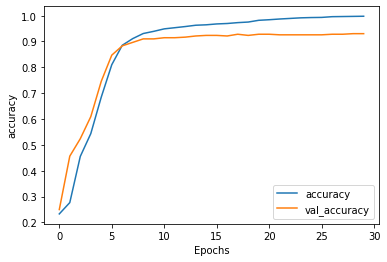

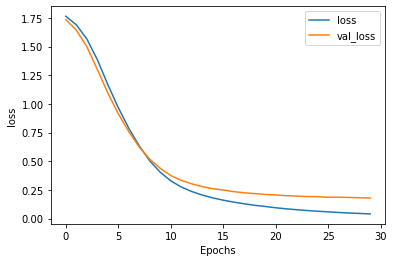

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  #history.history['']로 loss, acc, val_loss, val_acc를 확인가능하다 :history함수
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])  #.item()함수를 사용하면 딕셔너리에 있는 키와 값들의 쌍을 얻음
#key와 value 변경

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])  #.get() : 괄호안에 key를 넣어주면 value반환해줌, 두번째인자는 해당 key가 없을때 반환됐으면 하는것, 여기서는 ?이거임.


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]  #.get_weights(): 뉴런층의 시냅스 가중치 얻기, 뉴럴 네트워크의 뉴런과 뉴런 노드 사이를 연결하는 강도
print(weights.shape) # shape: (vocab_size, embedding_dim)

# Expected output
# (1000, 16)

(1000, 16)


In [ ]:
import io  #웹크롤러 : 웹정보를 제공하는 정해진 알고리즘으로 불러와 사용자에게 필요한 정보로 변환시켜주는 서비스 제공

#TSV 파일은 데이터 열이 탭으로 구분 된 데이터 테이블을 저장
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>